In [2]:
# importa las librerías
import ssl
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout


In [3]:
# carga el conjunto de datos de dígitos MNIST
data_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = data_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# normaliza las intensidades de los pixeles de las imágenes
x_train, x_test = x_train/255.0, x_test/255.0

In [5]:
# convierte etiquetas de clase enteras en código binario (one hot)
ytrain = tf.keras.utils.to_categorical(y_train)
ytest = tf.keras.utils.to_categorical(y_test)
print(y_train[0])
print(ytrain[0])

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [6]:
x_train = x_train.reshape(x_train.shape[0], 28,28)
x_test = x_test.reshape(x_test.shape[0], 28,28)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
# crea el modelo LeNet-5
model = tf.keras.models.Sequential([

   tf.keras.layers.SimpleRNN(256,activation='relu', input_shape=(28, 28), return_sequences=True),

   tf.keras.layers.SimpleRNN(128,activation='relu',return_sequences=True),

   tf.keras.layers.SimpleRNN(64,activation='relu'),
   tf.keras.layers.BatchNormalization(),


   tf.keras.layers.Dense(10, activation='softmax'),
   ])

In [8]:
# define algunos hiper-parámetros
n_epochs=25
n_batch=65
learning_rate=0.01
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [9]:
# configura el modelo para entrenamiento
model.compile(optimizer=opt,
   loss='categorical_crossentropy',
   metrics=['accuracy'])

In [10]:
# Entrena el modelo para un número fijo de épocas
Historia = model.fit(x_train, ytrain, validation_data=(x_test, ytest),
                     epochs=n_epochs, batch_size=n_batch)

Epoch 1/25
924/924 [==============================] - 93s 92ms/step - loss: 0.8089 - accuracy: 0.7196 - val_loss: 2.5915 - val_accuracy: 0.3870
Epoch 2/25
924/924 [==============================] - 81s 87ms/step - loss: 0.5079 - accuracy: 0.8236 - val_loss: 0.5555 - val_accuracy: 0.8131
Epoch 3/25
924/924 [==============================] - 82s 89ms/step - loss: 0.4361 - accuracy: 0.8445 - val_loss: 1.0364 - val_accuracy: 0.6920
Epoch 4/25
924/924 [==============================] - 81s 87ms/step - loss: 0.3961 - accuracy: 0.8585 - val_loss: 2.1114 - val_accuracy: 0.3597
Epoch 5/25
924/924 [==============================] - 82s 89ms/step - loss: 0.3751 - accuracy: 0.8661 - val_loss: 1.2590 - val_accuracy: 0.6120
Epoch 6/25
924/924 [==============================] - 83s 90ms/step - loss: 0.3583 - accuracy: 0.8712 - val_loss: 0.5681 - val_accuracy: 0.8055
Epoch 7/25
924/924 [==============================] - 82s 89ms/step - loss: 0.3441 - accuracy: 0.8771 - val_loss: 0.4715 - val_accuracy:

In [11]:
# Evalúa el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, ytest)

# Imprime la precisión en el conjunto de prueba
print(f'Precisión en el conjunto de prueba: {test_accuracy}')

313/313 [==============================] - 6s 18ms/step - loss: 0.3091 - accuracy: 0.8908
Precisión en el conjunto de prueba: 0.8907999992370605


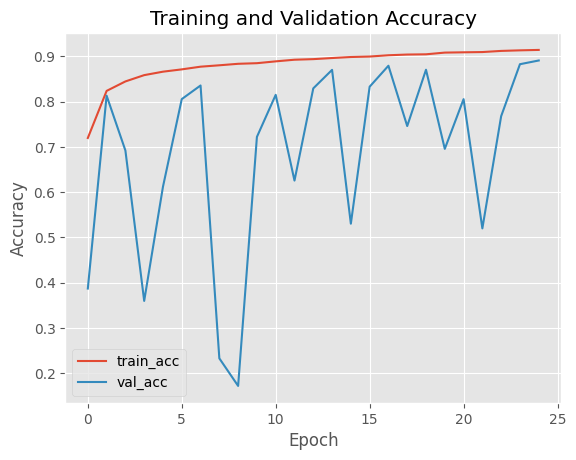

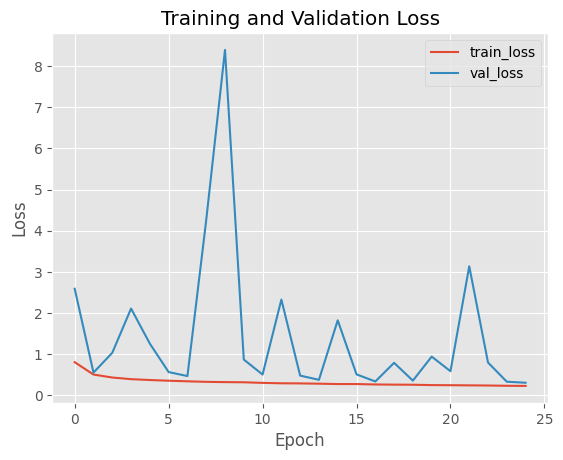

In [12]:
# Despliega las curvas de aprendizaje
H = Historia
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Realiza predicciones en el conjunto de prueba
predictions = model.predict(x_test)

# Convierte las etiquetas de un código binario a enteras
y_test = np.argmax(ytest, axis=1)
y_pred = np.argmax(predictions, axis=1)

# Genera el informe de clasificación
report = classification_report(y_test, y_pred)

# Imprime el informe
print(report)




313/313 [==============================] - 5s 15ms/step
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.84      0.82      1000
           3       0.88      0.90      0.89      1000
           4       0.78      0.88      0.82      1000
           5       0.98      0.96      0.97      1000
           6       0.78      0.63      0.69      1000
           7       0.93      0.98      0.96      1000
           8       0.96      0.98      0.97      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

